In [11]:
import sys, os
sys.path.insert(0, '../..')
from project_utils import *

# Pairwise ISC

In [2]:
ts_fnames = np.array(glob.glob(f'{ts_dir}/*'))
sub_info  = get_fname_ids(ts_fnames)

# put all timeseries into array w/ shape = (subs, rois, trials)
ts_subs   = []
rois_list = []
for fname in sub_info['fname']:
    ts_df = read_excel(fname)
    rois  = [r for r in ts_df['roi'].values if 'HO' in r] # should make sure they match
    rois_list.append(rois)
    ts_df = ts_df[ts_df['roi'].isin(rois)]
    ts_subs.append(ts_df.iloc[:, 1:].values)
ts_subs = np.array(ts_subs) 

# roi-based pairwise isc
isc_r = {}
for r, roi in enumerate(rois):
    isc_r[roi] = 1 - sklearn.metrics.pairwise_distances(ts_subs[:,r,:], metric='correlation') # faster than pd.corrcoef
    
    

included n=56


In [8]:
rois_ = ['MiddleFrontalGyrus', 'Hippocampus', 'Insular', 'Amygdala', 'Precuneous', 'Caudate', 'Putamen', 'Accumbens']
labels_ = get_region_labels(rois, rois_)
labels_

['HO_Cortl_LeftInsularCortex',
 'HO_Cortl_RightInsularCortex',
 'HO_Cortl_LeftMiddleFrontalGyrus',
 'HO_Cortl_RightMiddleFrontalGyrus',
 'HO_Cortl_LeftPrecuneousCortex',
 'HO_Cortl_RightPrecuneousCortex',
 'HO_Sub_LeftCaudate',
 'HO_Sub_LeftPutamen',
 'HO_Sub_LeftHippocampus',
 'HO_Sub_LeftAmygdala',
 'HO_Sub_LeftAccumbens',
 'HO_Sub_RightCaudate',
 'HO_Sub_RightPutamen',
 'HO_Sub_RightHippocampus',
 'HO_Sub_RightAmygdala',
 'HO_Sub_RightAccumbens']

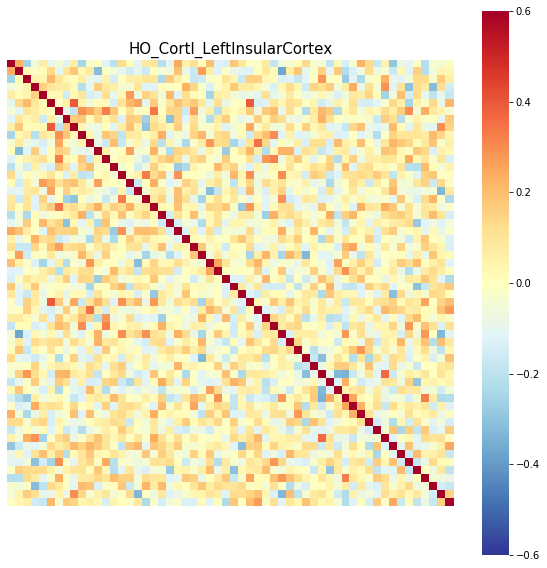

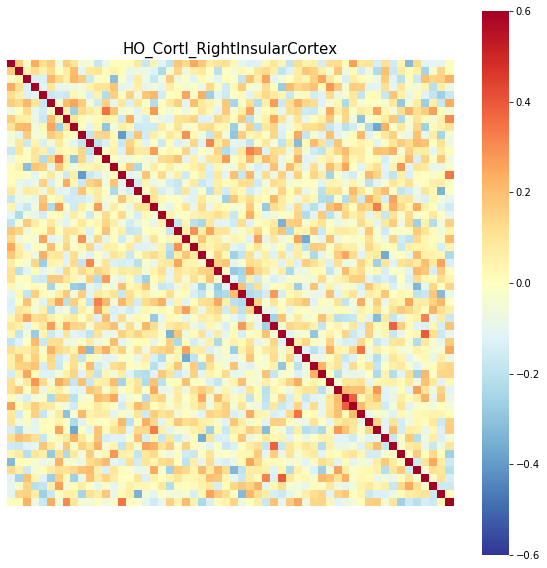

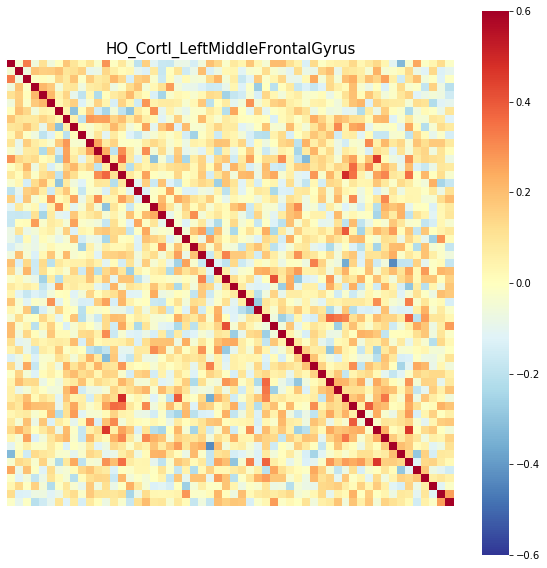

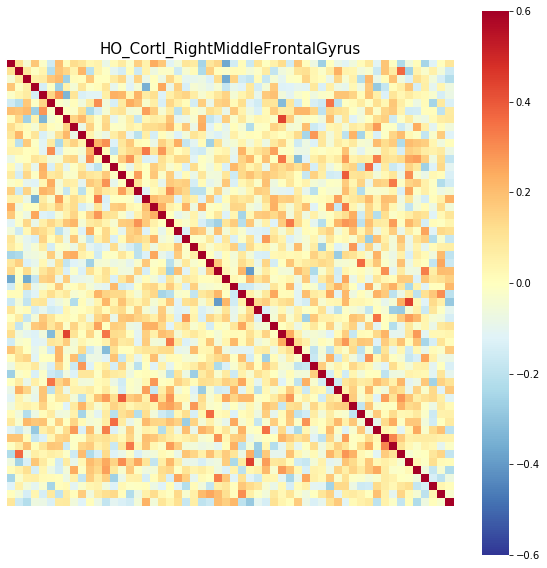

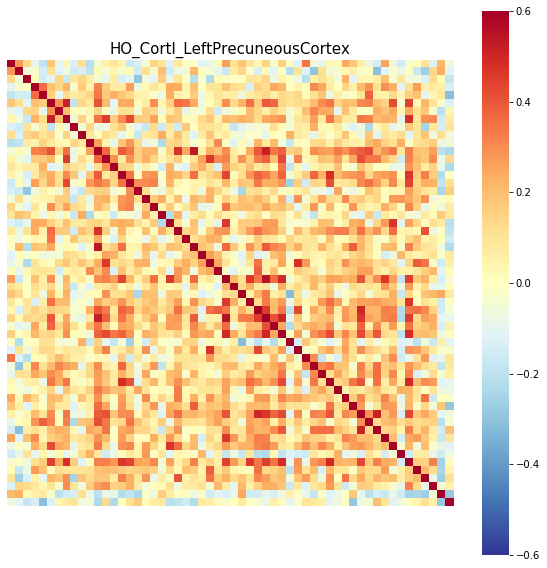

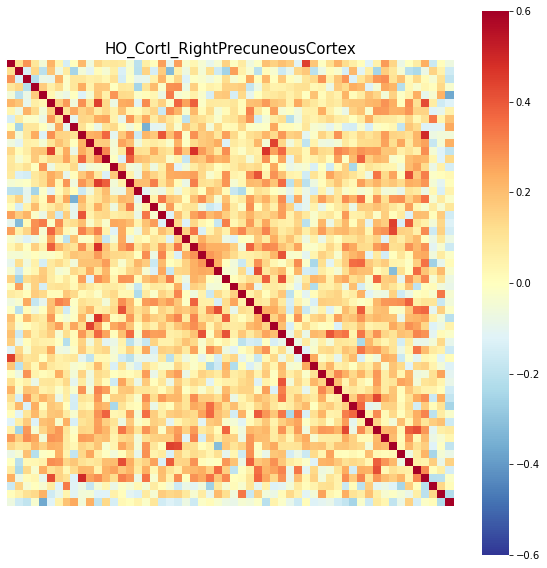

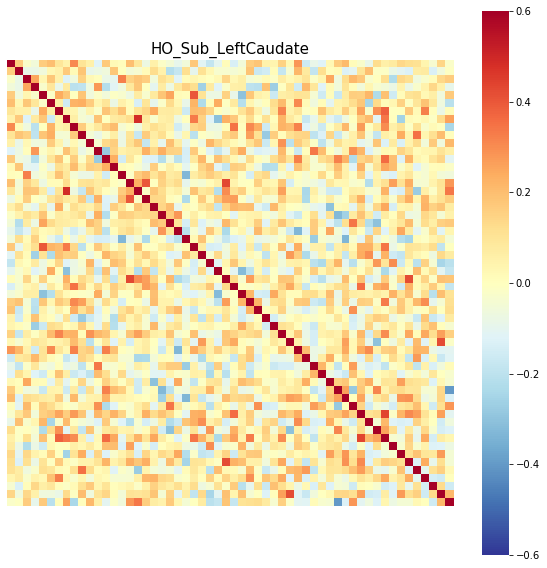

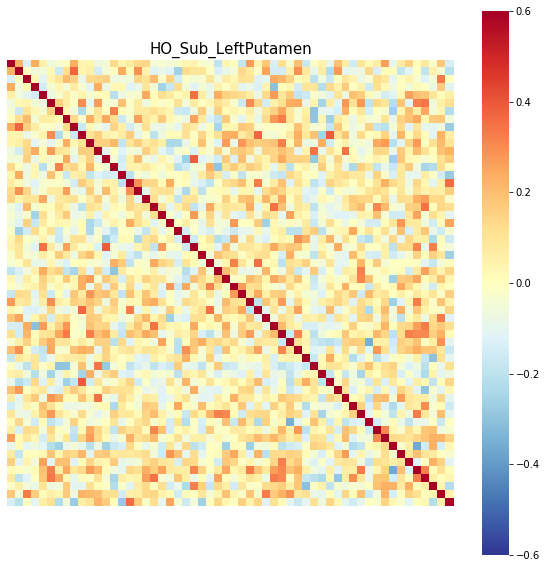

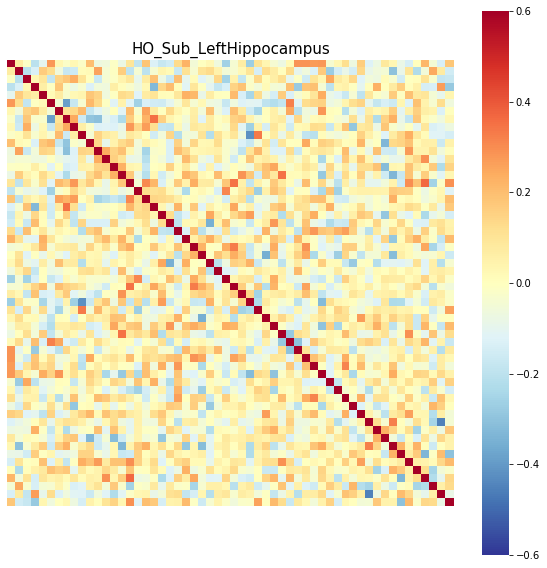

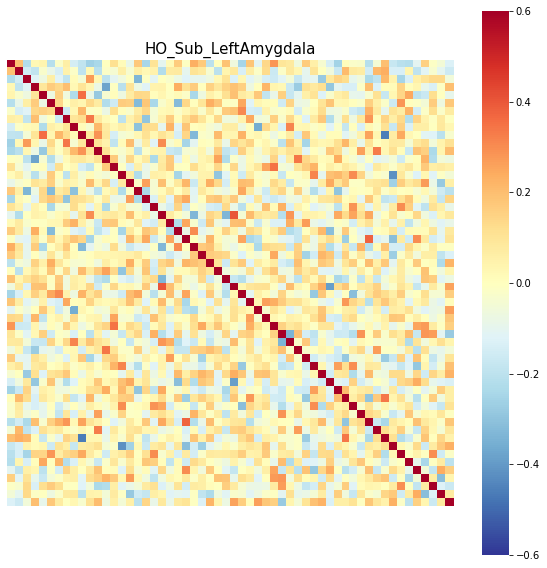

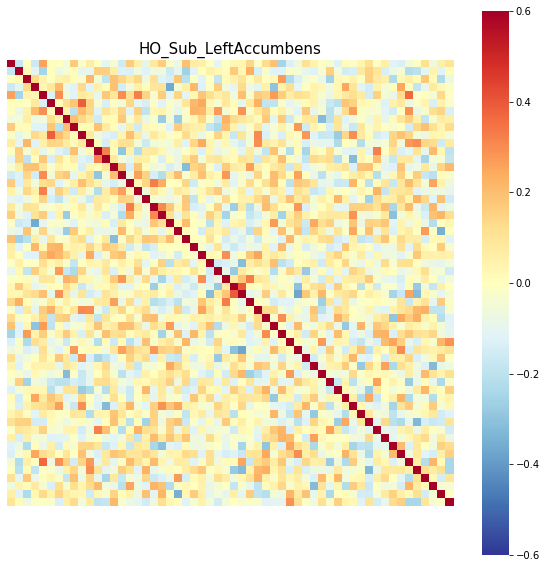

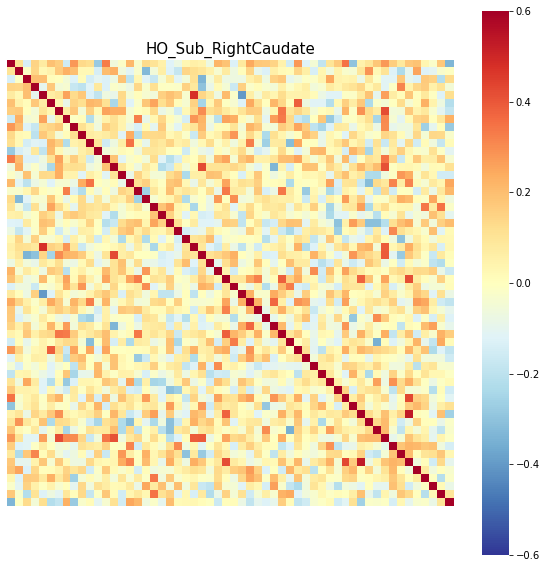

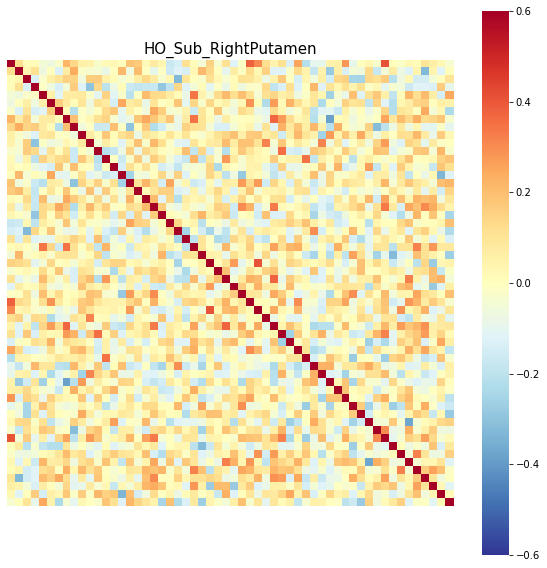

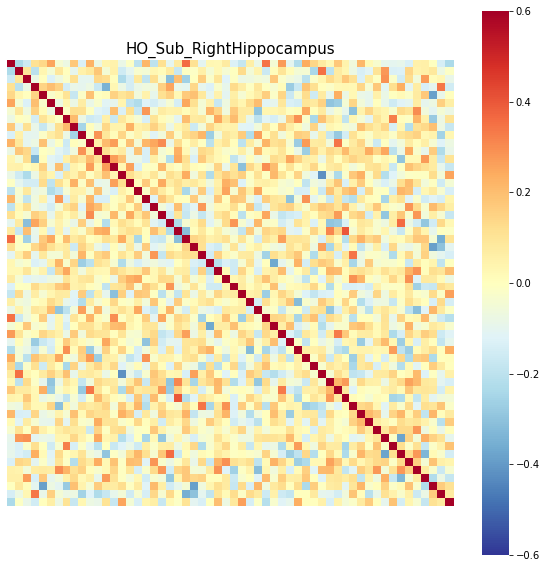

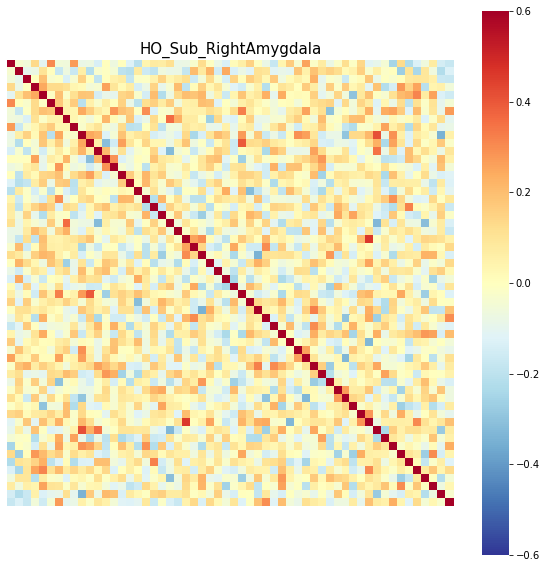

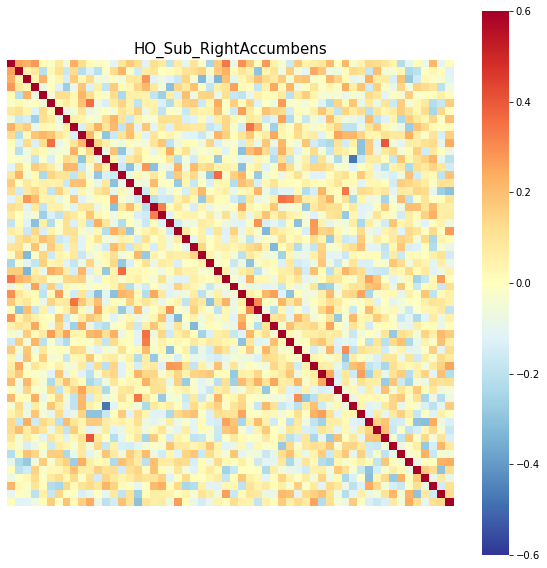

In [10]:
cmap = plt.cm.get_cmap('RdYlBu_r')
cmap.set_bad('#C0C0C0')

for label in labels_:
    
    plt.figure(figsize=(10,10))
    sns.heatmap(isc_r[label], square=True, 
                cmap=cmap, cbar=True, 
                vmax=.6, vmin=-.6,
                xticklabels=False, yticklabels=False)
    plt.title(label, fontsize=15)
    plt.show()

### some behavioral metric

In [44]:
# isc_r, isc_p = {}, {}
# for roi in range(50):
#     isc_r[roi], isc_p[roi] = stats['isc'], stats['p']